In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data from the .npz file
# filename = "FYP/Convergence 4000 Simulations/20 Window Naive Power Ranks 4000 MCS DIST_long ENG1 2018_2019 season.npz"
filename = "./FYP/ELO Model Experiments/Elo 2 2500 MCS ENG1 2018_2019 DIST_short.npz"
# filename = "11 Window Naive Power Ranks 4000 MCS DIST_short ENG1 2018_2019 season.npz"
# filename = "Elo 2 2500 MCS ENG1 2018_2019 DIST_short.npz"
loaded_data = np.load(filename, allow_pickle=True)

# Extract the arrays from the loaded data
team_names = loaded_data["team_names"]
expected_points = loaded_data["expected_points"]
all_points = loaded_data["all_points"]
# current_points = loaded_data["c"]
f_HDA_array = loaded_data["f_HDA"]
f_HDA_year_range_array = loaded_data["f_HDA_year_range"]
f_HDA_metadata_array = loaded_data["f_HDA_metadata"]
loaded_score_log = loaded_data["score_log"]
YYYY_range_file_names = loaded_data["YYYY_range_file_names"]
frequencies_home_win = loaded_data["frequencies_home_win"]
frequencies_home_draw = loaded_data["frequencies_home_draw"]
frequencies_home_loss = loaded_data["frequencies_home_loss"]
simulated_simple_balance = loaded_data["simulated_simple_balance"]
simulated_kelly_balance = loaded_data["simulated_kelly_balance"]
brier_score_and_rps_avg = loaded_data["brier_score_and_rps_avg"]
rps_all = loaded_data["rps_all"]
o_true = loaded_data["o_true"]
f_prob = loaded_data["f_prob"]
country_data = loaded_data["country_data"]
level_data = loaded_data["level_data"]

# get original dictionaries
f_HDA = { 'H': f_HDA_array[0], 'D': f_HDA_array[1], 'A': f_HDA_array[2] }
f_HDA_year_range = { 'YYYY_start': f_HDA_year_range_array[0], 'YYYY_end': f_HDA_year_range_array[1] }
f_HDA_metadata = { 'Countries': f_HDA_metadata_array[0], 'Level': f_HDA_metadata_array[1] }



In [2]:

# get ordered points dataframe
team_names = team_names.tolist()
expected_points = expected_points.tolist()
points_df = pd.DataFrame(np.array([team_names,expected_points]).T, columns=["Team","Simulated Average Points"])
points_df = points_df.sort_values(by=["Simulated Average Points"], ascending=False, ignore_index=True)
points_df.index += 1
print(points_df)
# print(f_prob)

              Team Simulated Average Points
1        Liverpool                     81.2
2         Man City                  80.3104
3        Tottenham                  78.3772
4       Man United                  75.4912
5          Chelsea                   71.324
6          Arsenal                  70.6096
7        Leicester                  49.5792
8          Everton                  46.8532
9         West Ham                  46.3144
10  Crystal Palace                  45.4432
11     Bournemouth                  44.4488
12         Burnley                  43.7436
13         Watford                  43.1928
14       Newcastle                  42.6256
15     Southampton                  42.5568
16          Wolves                  42.3348
17        Brighton                  39.4844
18          Fulham                  36.6196
19         Cardiff                  35.2828
20    Huddersfield                    32.07


In [3]:
for f in f_prob:
    print(f)

[0.74528302 0.16037736 0.09433962]
[0.58024691 0.2962963  0.12345679]
[0.2617801 0.4973822 0.2408377]
[0.11111111 0.16666667 0.72222222]
[0.08510638 0.10638298 0.80851064]
[0.41414141 0.31313131 0.27272727]
[0.24742268 0.24742268 0.50515464]
[0.3164557 0.2278481 0.4556962]
[0.76923077 0.19230769 0.03846154]
[0.37575758 0.29090909 0.33333333]
[0.25179856 0.30215827 0.44604317]
[0.50970874 0.32038835 0.16990291]
[0.50955414 0.2611465  0.22929936]
[0.58024691 0.2962963  0.12345679]
[0.875  0.0625 0.0625]
[0.41414141 0.31313131 0.27272727]
[0.04545455 0.09090909 0.86363636]
[0.53846154 0.22307692 0.23846154]
[0.45171057 0.2567363  0.29155313]
[0.1754386  0.28070175 0.54385965]
[0.64383562 0.24657534 0.10958904]
[0.41414141 0.31313131 0.27272727]
[0.41414141 0.31313131 0.27272727]
[0.85 0.   0.15]
[0.2617801 0.4973822 0.2408377]
[0.45171057 0.2567363  0.29155313]
[0.2617801 0.4973822 0.2408377]
[0.13592233 0.14563107 0.7184466 ]
[0.2617801 0.4973822 0.2408377]
[0.37575758 0.29090909 0.33333

In [4]:
brier_score = brier_score_and_rps_avg[0]
rps_avg = brier_score_and_rps_avg[1]
Country = country_data[0]
Level = level_data[0]
YYYY_start = YYYY_range_file_names[0]
YYYY_end = YYYY_range_file_names[1]
k = len(simulated_simple_balance)


def accuracy_indicator_function():
    max_indices_f_prob = np.argmax(f_prob, axis=1) # get indices of maximum
    max_indices_o_true = np.argmax(o_true, axis=1) # get indices of maximum
    # xor = np.logical_xor(max_indices_f_prob, max_indices_o_true)
    # not_xor = np.logical_not(xor).astype(int)
    # return not_xor
    list = []
    print(len(max_indices_o_true))
    for i in range(0,len(max_indices_o_true)):
        if max_indices_f_prob[i] == max_indices_o_true[i]:
            list.append(1)
        else:
            list.append(0)
    return np.array(list)


indicator_list = accuracy_indicator_function()
accuracy = np.sum(indicator_list)/len(indicator_list)

print(f'{k} Simulations:')
print(f"Brier Score {brier_score} for {Country}1 : {YYYY_start-1}-{YYYY_end-1} season")
print(f"RPS_avg {rps_avg} for {Country}1 : {YYYY_start-1}-{YYYY_end-1} season")
print(f"Accuracy {accuracy} for {Country}1 : {YYYY_start-1}-{YYYY_end-1} season")


# for f in f_prob:
#     print(f)
#
# print(frequencies_home_win)
# print(frequencies_home_draw)
# print(frequencies_home_loss)

380
2500 Simulations:
Brier Score 0.5253216850294128 for ENG1 : 2018-2019 season
RPS_avg 0.17882392790909069 for ENG1 : 2018-2019 season
Accuracy 0.6105263157894737 for ENG1 : 2018-2019 season


Liverpool


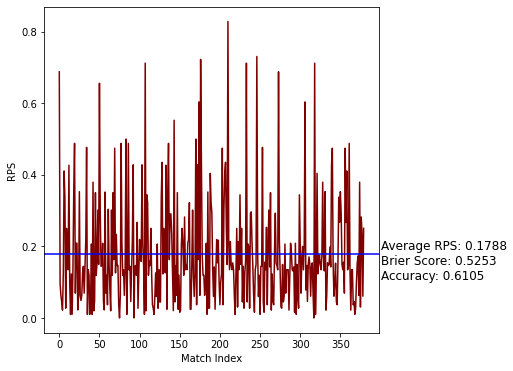

In [5]:


def plot_rps(x_axis, y_axis, title, x_label, y_label):
    # plt.
    plt.plot(x_axis, y_axis, color ='maroon')
    # plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.axhline(y=np.mean(np.array(y_axis)), color ='blue')
    plt.text(x=400, y=(np.mean(np.array(y_axis))-.02), s=f'Average RPS: {round(np.mean(np.array(y_axis)),4)}\nBrier Score: {round(brier_score,4)}\nAccuracy: {round(accuracy,4)}',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    plt.savefig('Rank Probability Score.png', dpi=300, bbox_inches='tight')
    plt.show()
def plot_points(x_axis, y_axis, title, x_label, y_label):
    # plt.

    y_axis = np.cumsum(np.array(y_axis), axis=0) / np.array(np.arange(1,len(y_axis)+1))
    plt.plot(x_axis, y_axis, color ='maroon')
    plt.title(title)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    # plt.savefig('Converge.png', dpi=300, bbox_inches='tight')
    plt.show()

print(team_names[0])
all_points = all_points.tolist()
plot_rps(range(0,len(rps_all),1),rps_all,"Rank Probability Score (RPS) Per Simulated Match Outcome", "Match Index", "RPS")




Liverpool
[65, 77, 88, 87, 84, 86, 85, 74, 87, 81, 79, 82, 85, 65, 78, 74, 87, 70, 70, 84, 80, 91, 83, 77, 81, 75, 80, 68, 89, 73, 87, 93, 88, 82, 63, 58, 87, 69, 86, 91, 85, 88, 85, 78, 87, 79, 79, 75, 89, 79, 74, 76, 86, 98, 89, 82, 67, 78, 94, 76, 80, 80, 93, 84, 78, 73, 90, 93, 86, 76, 86, 75, 83, 69, 71, 92, 85, 82, 80, 67, 82, 74, 76, 78, 83, 84, 74, 88, 90, 79, 71, 86, 89, 88, 100, 89, 81, 90, 82, 81, 79, 82, 91, 70, 80, 82, 82, 77, 74, 81, 81, 83, 94, 89, 68, 86, 89, 91, 82, 89, 84, 84, 99, 76, 79, 83, 77, 69, 79, 77, 87, 89, 82, 70, 80, 67, 82, 83, 88, 79, 74, 67, 89, 75, 74, 78, 84, 79, 84, 84, 74, 74, 67, 78, 93, 88, 79, 76, 65, 85, 77, 83, 64, 90, 80, 75, 80, 82, 74, 75, 74, 72, 74, 92, 66, 83, 81, 66, 73, 85, 77, 81, 80, 86, 88, 78, 75, 93, 81, 89, 79, 90, 80, 82, 69, 61, 87, 92, 87, 77, 90, 91, 71, 77, 71, 84, 84, 64, 77, 86, 79, 87, 91, 84, 76, 79, 75, 73, 95, 76, 79, 66, 79, 84, 73, 95, 89, 85, 87, 80, 93, 93, 87, 78, 72, 79, 76, 76, 81, 88, 92, 83, 70, 79, 63, 79, 86, 

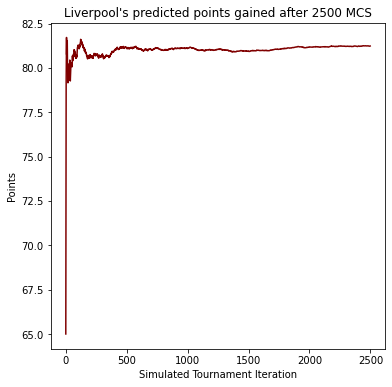

Man City
Tottenham
Man United
Chelsea
Arsenal
Leicester
[39, 63, 45, 48, 60, 53, 48, 64, 50, 53, 53, 50, 42, 60, 53, 55, 35, 46, 55, 53, 58, 50, 40, 66, 47, 47, 47, 51, 37, 64, 55, 53, 50, 30, 56, 58, 52, 70, 80, 52, 52, 51, 42, 44, 52, 59, 47, 41, 37, 57, 34, 47, 33, 47, 52, 56, 49, 43, 61, 54, 51, 59, 56, 45, 56, 45, 40, 56, 57, 48, 44, 64, 56, 58, 41, 44, 50, 58, 56, 55, 41, 41, 53, 44, 43, 45, 60, 54, 54, 38, 45, 68, 46, 53, 59, 46, 45, 44, 45, 61, 54, 37, 47, 47, 48, 45, 45, 51, 44, 49, 59, 44, 59, 50, 47, 54, 45, 49, 48, 36, 56, 39, 36, 49, 48, 47, 52, 46, 46, 62, 42, 57, 43, 33, 64, 53, 58, 46, 60, 42, 35, 53, 41, 44, 51, 50, 54, 45, 44, 57, 55, 63, 45, 57, 34, 50, 43, 51, 60, 56, 57, 55, 60, 38, 51, 60, 49, 58, 46, 51, 56, 58, 47, 58, 53, 47, 55, 49, 46, 59, 65, 49, 58, 43, 51, 55, 52, 47, 67, 59, 53, 59, 47, 53, 56, 63, 60, 64, 62, 47, 61, 43, 55, 47, 58, 34, 55, 51, 50, 36, 60, 40, 52, 52, 39, 53, 48, 47, 42, 59, 50, 53, 49, 46, 44, 46, 45, 52, 48, 62, 56, 44, 34, 56, 50, 44,

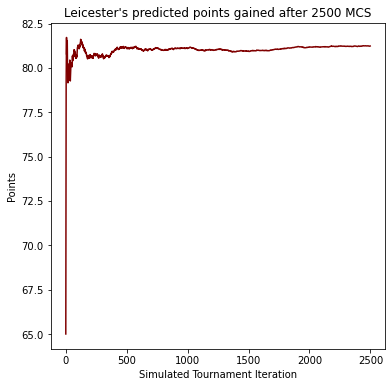

Everton
West Ham
Crystal Palace
Bournemouth
Burnley
Watford
Newcastle
Southampton
Wolves
Brighton
Fulham
Cardiff
Huddersfield


In [6]:
for i in range(0, len(team_names), 1):
    print(team_names[i])
    if team_names[i] == 'Liverpool' or team_names[i] == 'Leicester':
        print(all_points[team_names[i]])
        plot_points(range(0,len(all_points[team_names[i]]),1),all_points[team_names[0]],f"{team_names[i]}'s predicted points gained after {len(all_points[team_names[i]])+1} MCS", "Simulated Tournament Iteration", "Points")

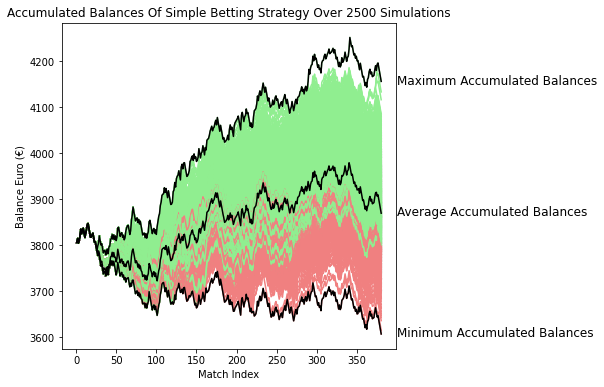

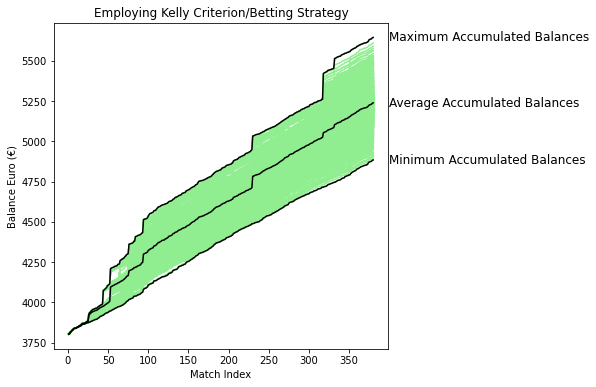

In [7]:
# def moving_average(a, n=5) :
#     '''https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy'''
#     ret = np.cumsum(a, dtype=float)
#     ret[n:] = ret[n:] - ret[:-n]
#     print( ret)
#     return np.mean(ret[n - 1:] / n, axis=0)
def get_max_line(x):

    y = np.zeros(shape=[np.shape(x)[1]])
    for i in range(np.shape(x)[1]):
        arr = x[:,i]
        y[i] += max(arr)
    return y.tolist()

def get_min_line(x):

    y = np.zeros(shape=[np.shape(x)[1]])
    for i in range(np.shape(x)[1]):
        arr = x[:,i]
        y[i] += min(arr)
    return y.tolist()

def get_avg_line(x):
    # print(np.shape(x)[0],np.shape(x)[1])
    y = np.zeros(shape=[np.shape(x)[1]])
    for z in x.tolist():
        y += np.array(z)
    # print(y)
    # print(np.shape(y))
    y /= np.shape(x)[0]
    return y.tolist()
    # return np.convolve(y, np.ones(w), 'valid') / w

def plot_balances_simulated(x_axis, y_axis, title, x_label, y_label):
    # plt.
    for y_list in y_axis:
        color = ""
        last_bal = y_list[-1]
        if last_bal < 3800:
            # color += "red"
            color += "lightcoral"
        elif last_bal > 3800:
            # color += "green"
            color += "lightgreen"
        else:
            # sum_y == 1000
            color += "blue"
        plt.plot(x_axis, y_list, color=color)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_axis, get_max_line(y_axis), color ='black')
    plt.text(x=400, y=get_max_line(y_axis)[-1]+2, s='Maximum Accumulated Balances',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    plt.plot(x_axis, get_min_line(y_axis), color ='black')
    plt.text(x=400, y=get_min_line(y_axis)[-1]+2, s='Minimum Accumulated Balances',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    plt.plot(x_axis, get_avg_line(y_axis), color ='black')
    plt.text(x=400, y=get_avg_line(y_axis)[-1]+2, s='Average Accumulated Balances',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    plt.savefig('Betting_model.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_balances_simulated(range(1,len(simulated_simple_balance[0])+1,1),simulated_simple_balance, f"Accumulated Balances Of Simple Betting Strategy Over {k} Simulations",  "Match Index", "Balance Euro (€)")
plot_balances_simulated(range(1,len(simulated_kelly_balance[0])+1,1),simulated_kelly_balance, f"Employing Kelly Criterion/Betting Strategy",  "Match Index", "Balance Euro (€)")

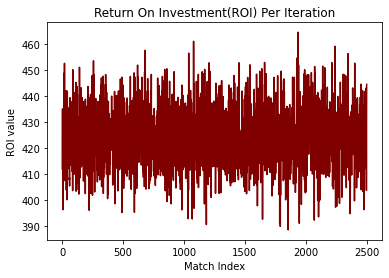

Average ROI:  423.9631030575315
5239.631030575315


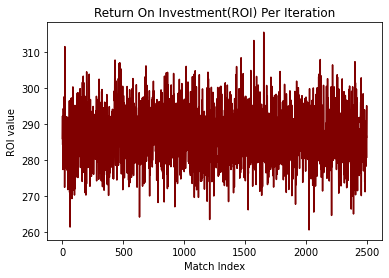

Average ROI:  286.9525159999998
3869.525159999998


In [8]:
#To calculate the ROI:

def plot_roi(x_axis, y_axis, title, x_label, y_label):
    # plt.
    plt.plot(x_axis, y_axis, color ='maroon')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.axhline(y=np.mean(np.array(y_axis)), color ='blue')
    plt.show()
#ROI = (Total Profit / Total Investment) x 100%
ROI = []
for season_balance in simulated_kelly_balance:
    profit = season_balance[-1]-1000
    ROI.append((profit/1000)*100)
plot_roi(range(1,len(ROI)+1), ROI,"Return On Investment(ROI) Per Iteration", "Match Index","ROI value")

# # Create a bar chart of ROI values
# plt.bar(range(len(ROI)), ROI, color='maroon')
# plt.xlabel('Simulation number')
# plt.ylabel('ROI (%)')
# plt.title('ROI for Simulated Account Balances')
# plt.show()
print("Average ROI: ",((np.mean(np.array(simulated_kelly_balance[:,[-1]]))-1000)/1000)*100)
# print(ROI)
print(np.mean(np.array(simulated_kelly_balance[:,[-1]])))

ROI = []
for season_balance in simulated_simple_balance:
    profit = season_balance[-1]-1000
    ROI.append((profit/1000)*100)
plot_roi(range(1,len(ROI)+1), ROI,"Return On Investment(ROI) Per Iteration", "Match Index","ROI value")


# # Create a bar chart of ROI values
# plt.bar(range(len(ROI)), ROI, color='maroon')
# plt.xlabel('Simulation number')
# plt.ylabel('ROI (%)')
# plt.title('ROI for Simulated Account Balances')
# plt.show()
print("Average ROI: ",((np.mean(np.array(simulated_simple_balance[:,[-1]]))-1000)/1000)*100)
# print(ROI)
print(np.mean(np.array(simulated_simple_balance[:,[-1]])))

In [9]:
print("Simulations:", k)
print("team_names:", team_names)
print("expected_points:", expected_points)
print("f_HDA:", f_HDA)
print("f_HDA_year_range:", f_HDA_year_range)
print("f_HDA_metadata:", f_HDA_metadata)
print("loaded_score_log:", loaded_score_log)
print("YYYY_range_file_names:", YYYY_range_file_names)
print("frequencies_home_win:", frequencies_home_win)
print("frequencies_home_draw:", frequencies_home_draw)
print("frequencies_home_loss:", frequencies_home_loss)
# print("simulated_balance_history:", simulated_balance_history)
print("brier_score_and_rps_avg:", brier_score_and_rps_avg)
# print("rps_all:", rps_all)
# print("o_true:", o_true)
# print("f_prob:", f_prob)


Simulations: 2500
team_names: ['Liverpool', 'Man City', 'Tottenham', 'Man United', 'Chelsea', 'Arsenal', 'Leicester', 'Everton', 'West Ham', 'Crystal Palace', 'Bournemouth', 'Burnley', 'Watford', 'Newcastle', 'Southampton', 'Wolves', 'Brighton', 'Fulham', 'Cardiff', 'Huddersfield']
expected_points: [81.2, 80.3104, 78.3772, 75.4912, 71.324, 70.6096, 49.5792, 46.8532, 46.3144, 45.4432, 44.4488, 43.7436, 43.1928, 42.6256, 42.5568, 42.3348, 39.4844, 36.6196, 35.2828, 32.07]
f_HDA: {'H': 26230, 'D': 15982, 'A': 14956}
f_HDA_year_range: {'YYYY_start': 2016, 'YYYY_end': 2019}
f_HDA_metadata: {'Countries': ['ENG'], 'Level': []}
loaded_score_log: [[110284 126923 105056  48571  20377  10080     36      5      3]
 [139150 155139 158620  63980  10476  17629     28      3      3]
 [212341 143022  68237  31034    295     75   2522      2      2]
 [ 60004 122631  46457  10604    128     42      9      1      0]
 [ 30991  28564  35586  15227     63     15      3      1      0]
 [ 25343  10334    153  